In [40]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)



begin_surroundings = 198
end_surroundings = 199

begin_earthquake = 6259313254
end_earthquake =   6259316754

In [41]:
time_list_RKDP5 = []
dt_array_RKDP5 = []
V_array_RKDP5 = []
rhs_count_array_RKDP5 = []
error_abs_psi_RKDP5 = []
error_abs_S_RKDP5 = []
error_rel_psi_RKDP5 = []
error_rel_S_RKDP5 = []
max_S_RKDP5 = []
min_S_RKDP5 = []
max_PSI_RKDP5 = []
min_PSI_RKDP5 = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/timeAnalysis_RKDP5.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_RKDP5.append(time)
            dt_array_RKDP5.append(dt)

            V_array_RKDP5.append(row['Vmax'])
            rhs_count_array_RKDP5.append(row['count_rhs'])
            error_abs_psi_RKDP5.append(row['errorPSIabs'])
            error_abs_S_RKDP5.append(row['errorSabs'])
            error_rel_psi_RKDP5.append(row['errorPSIrel'])
            error_rel_S_RKDP5.append(row['errorSrel'])
            max_S_RKDP5.append(row['maxS'])
            min_S_RKDP5.append(row['minS'])
            max_PSI_RKDP5.append(row['maxPSI'])
            min_PSI_RKDP5.append(row['minPSI'])

time_array_RKDP5 = np.asarray(time_list_RKDP5, dtype=np.float64)
dt_array_RKDP5 = np.asarray(dt_array_RKDP5, dtype=np.float64)
V_array_RKDP5 = np.asarray(V_array_RKDP5, dtype=np.float64)
rhs_count_array_RKDP5 = np.asarray(rhs_count_array_RKDP5, dtype=np.float64)
error_abs_psi_RKDP5 = np.asarray(error_abs_psi_RKDP5, dtype=np.float64)
error_abs_S_RKDP5 = np.asarray(error_abs_S_RKDP5, dtype=np.float64)
error_rel_psi_RKDP5 = np.asarray(error_rel_psi_RKDP5, dtype=np.float64)
error_rel_S_RKDP5 = np.asarray(error_rel_S_RKDP5, dtype=np.float64)
max_S_RKDP5 = np.asarray(max_S_RKDP5, dtype=np.float64)
min_S_RKDP5 = np.asarray(min_S_RKDP5, dtype=np.float64)
max_PSI_RKDP5 = np.asarray(max_PSI_RKDP5, dtype=np.float64)
min_PSI_RKDP5 = np.asarray(min_PSI_RKDP5, dtype=np.float64)

time_years_RKDP5 = time_array_RKDP5 / (365.2425*24*3600)


In [42]:
time_list_RKBS3 = []
dt_array_RKBS3 = []
V_array_RKBS3 = []
rhs_count_array_RKBS3 = []
time_old = 0.0

#don't plot first component
first = 1

with open('../results/timeAnalysis_RKBS3.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if first:
            first = 0
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_RKBS3.append(time)
            dt_array_RKBS3.append(dt)

            V_array_RKBS3.append(row['Vmax'])
            rhs_count_array_RKBS3.append(row['count_rhs'])

time_array_RKBS3 = np.asarray(time_list_RKBS3, dtype=np.float64)
dt_array_RKBS3 = np.asarray(dt_array_RKBS3, dtype=np.float64)
V_array_RKBS3 = np.asarray(V_array_RKBS3, dtype=np.float64)
rhs_count_array_RKBS3 = np.asarray(rhs_count_array_RKBS3, dtype=np.float64)

time_years_RKBS3 =  time_array_RKBS3 / (365.2425*24*3600)


In [43]:
time_list_BDF3 = []
dt_array_BDF3 = []
V_array_BDF3 = []
rhs_count_array_BDF3 = []
time_old = 0.0

#don't plot first component
first = 1

with open('../results/timeAnalysis_BDF4_default.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if first:
            first = 0
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_BDF3.append(time)
            dt_array_BDF3.append(dt)

            V_array_BDF3.append(row['Vmax'])
            rhs_count_array_BDF3.append(row['count_rhs'])

time_array_BDF3 = np.asarray(time_list_BDF3, dtype=np.float64)
dt_array_BDF3 = np.asarray(dt_array_BDF3, dtype=np.float64)
V_array_BDF3 = np.asarray(V_array_BDF3, dtype=np.float64)
rhs_count_array_BDF3 = np.asarray(rhs_count_array_BDF3, dtype=np.float64)

time_years_BDF3 =  time_array_BDF3 / (365.2425*24*3600)


In [44]:
def prepare_interpolation_array(time, data):
    i = 1
    while(i<len(time)):
        if time[i] <= time[i-1]:
            time = np.delete(time,i)
            data = np.delete(data,i)
        else:
            i += 1            
    interpolation_fun = interp1d(time, data, kind='cubic')
    return interpolation_fun
    

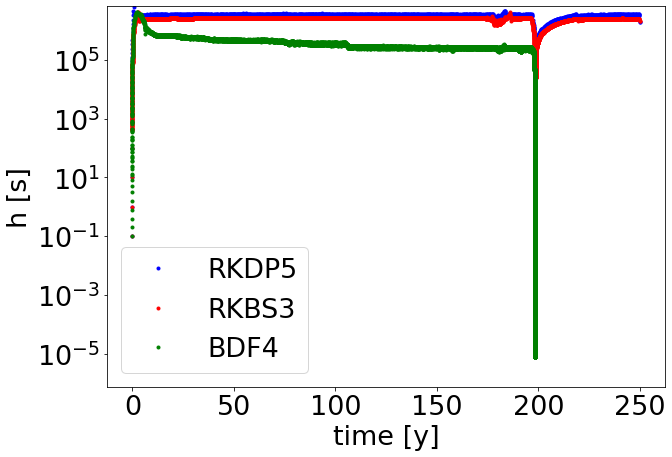

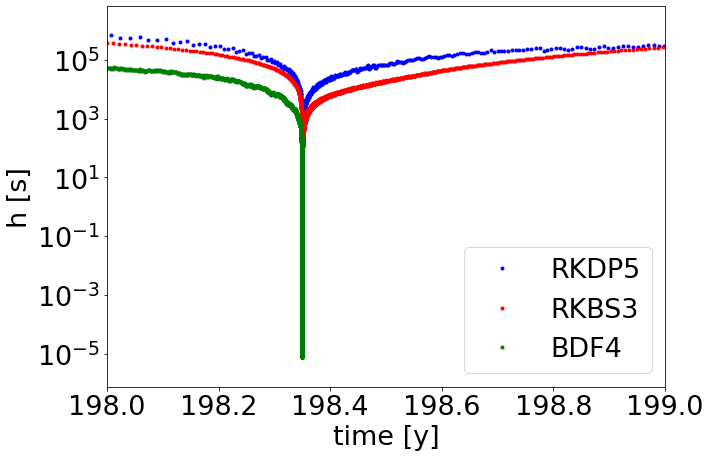

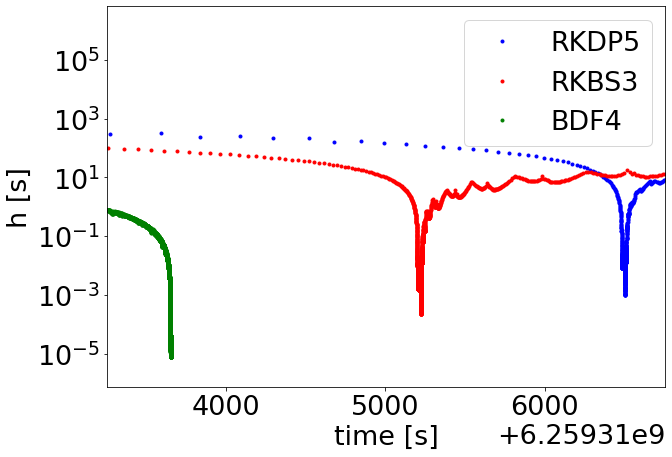

In [45]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, dt_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_years_RKBS3, dt_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_years_BDF3, dt_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("h [s]")

plt.yscale('log')

plt.ylim(0.1*min(np.min(dt_array_BDF3),min(np.min(dt_array_RKDP5), np.min(dt_array_RKBS3))), 1.1*max(np.max(dt_array_BDF3),max(np.max(dt_array_RKDP5), np.max(dt_array_RKBS3))))

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionDTall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, dt_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_years_RKBS3, dt_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_years_BDF3, dt_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("h [s]")

plt.yscale('log')

plt.ylim(0.1*min(np.min(dt_array_BDF3),min(np.min(dt_array_RKDP5), np.min(dt_array_RKBS3))), 1.1*max(np.max(dt_array_BDF3),max(np.max(dt_array_RKDP5), np.max(dt_array_RKBS3))))
plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionDTsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()


#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_array_RKDP5, dt_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_array_RKBS3, dt_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_array_BDF3, dt_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [s]")
plt.ylabel("h [s]")

plt.ylim(0.1*min(np.min(dt_array_BDF3),min(np.min(dt_array_RKDP5), np.min(dt_array_RKBS3))), 1.1*max(np.max(dt_array_BDF3),max(np.max(dt_array_RKDP5), np.max(dt_array_RKBS3))))
plt.xlim(begin_earthquake, end_earthquake)

plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionDTearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



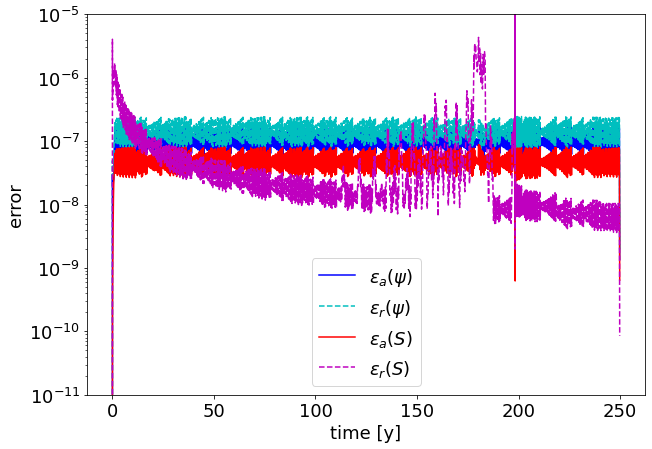

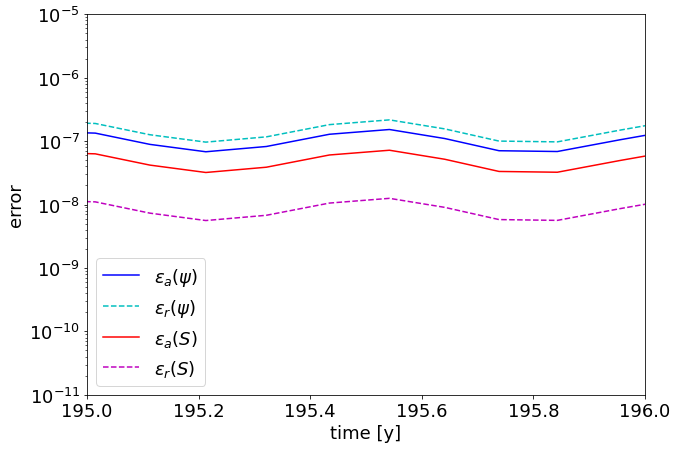

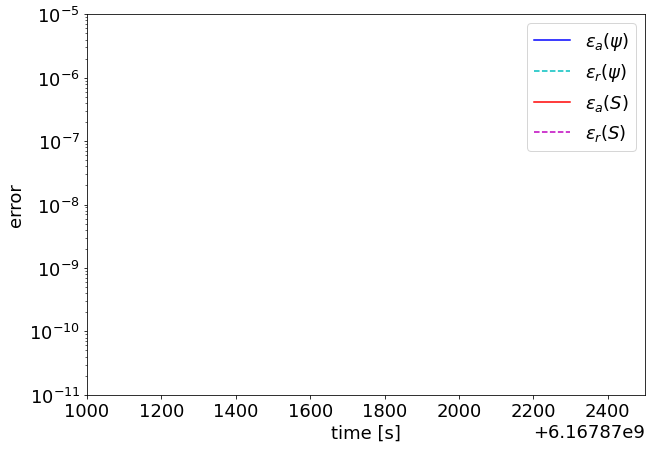

In [18]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_RKDP5, error_abs_psi_RKDP5,'-b', label =r'$\epsilon_a(\psi)$')
plt.plot(time_years_RKDP5, error_rel_psi_RKDP5,'--c', label =r'$\epsilon_r(\psi)$')

plt.plot(time_years_RKDP5, error_abs_S_RKDP5,'-r', label =r'$\epsilon_a(S)$')
plt.plot(time_years_RKDP5, error_rel_S_RKDP5,'--m', label =r'$\epsilon_r(S)$')

plt.xlabel("time [y]")
plt.ylabel("error")

plt.yscale('log')

plt.ylim(1e-11, 1e-5)
#plt.ylim(0.1*min(min(np.min(error_abs_V_RKDP5), np.min(error_rel_V_RKDP5)),
#                 min(np.min(error_abs_psi_RKDP5), np.min(error_rel_psi_RKDP5))), 
#         1.1*max(max(np.max(error_rel_V_RKDP5), np.max(error_rel_V_RKDP5)),
#                 max(np.max(error_abs_psi_RKDP5), np.max(error_rel_psi_RKDP5))))

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionErrorall_RKDP5.png', format='png',dpi=300)

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(time_years_RKDP5, error_abs_psi_RKDP5,'-b', label =r'$\epsilon_a(\psi)$')
plt.plot(time_years_RKDP5, error_rel_psi_RKDP5,'--c', label =r'$\epsilon_r(\psi)$')

plt.plot(time_years_RKDP5, error_abs_S_RKDP5,'-r', label =r'$\epsilon_a(S)$')
plt.plot(time_years_RKDP5, error_rel_S_RKDP5,'--m', label =r'$\epsilon_r(S)$')

plt.xlabel("time [y]")
plt.ylabel("error")

plt.yscale('log')

plt.ylim(1e-11, 1e-5)
#plt.ylim(0.1*min(min(np.min(error_abs_V_RKDP5), np.min(error_rel_V_RKDP5)),
#                 min(np.min(error_abs_psi_RKDP5), np.min(error_rel_psi_RKDP5))), 
#         1.1*max(max(np.max(error_rel_V_RKDP5), np.max(error_rel_V_RKDP5)),
#                 max(np.max(error_abs_psi_RKDP5), np.max(error_rel_psi_RKDP5))))

plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionErrorsurroundings_RKDP5.png', format='png',dpi=300)

plt.show()


#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(time_years_RKDP5, error_abs_psi_RKDP5,'-b', label =r'$\epsilon_a(\psi)$')
plt.plot(time_years_RKDP5, error_rel_psi_RKDP5,'--c', label =r'$\epsilon_r(\psi)$')

plt.plot(time_years_RKDP5, error_abs_S_RKDP5,'-r', label =r'$\epsilon_a(S)$')
plt.plot(time_years_RKDP5, error_rel_S_RKDP5,'--m', label =r'$\epsilon_r(S)$')

plt.xlabel("time [s]")
plt.ylabel("error")

plt.ylim(1e-11, 1e-5)
#plt.ylim(0.1*min(min(np.min(error_abs_V_RKDP5), np.min(error_rel_V_RKDP5)),
#                 min(np.min(error_abs_psi_RKDP5), np.min(error_rel_psi_RKDP5))), 
#         1.1*max(max(np.max(error_rel_V_RKDP5), np.max(error_rel_V_RKDP5)),
#                 max(np.max(error_abs_psi_RKDP5), np.max(error_rel_psi_RKDP5))))

plt.xlim(begin_earthquake, end_earthquake)

plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionErrorearthquake_RKDP5.png', format='png',dpi=300)

plt.show()



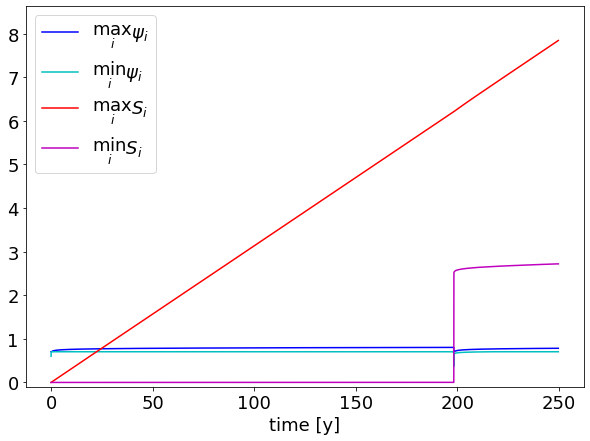

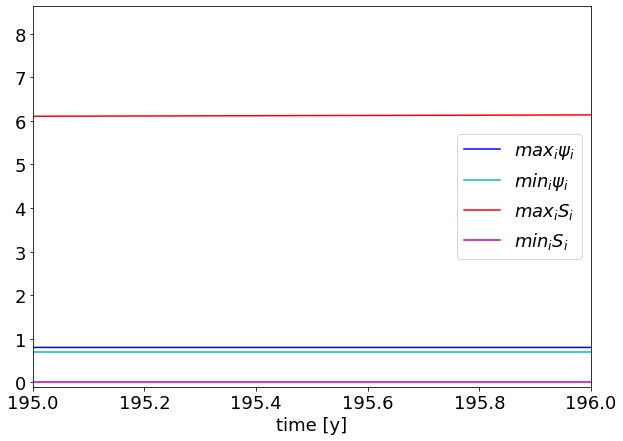

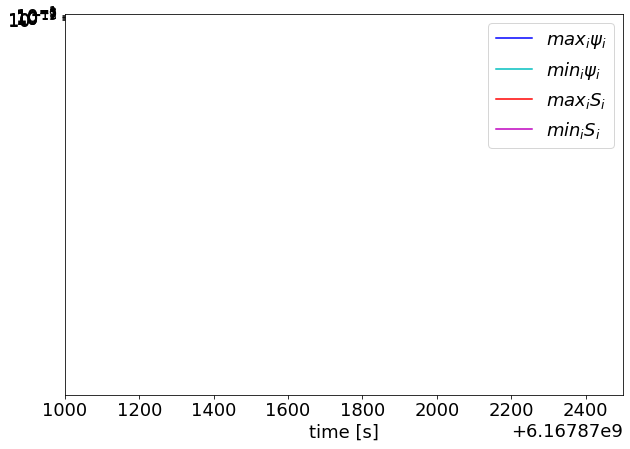

In [20]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_RKDP5, max_PSI_RKDP5,'-b', label =r'$\max_i\psi_i$')
plt.plot(time_years_RKDP5, min_PSI_RKDP5,'-c', label =r'$\min_i\psi_i$')

plt.plot(time_years_RKDP5, max_S_RKDP5,'-r', label =r'$\max_iS_i$')
plt.plot(time_years_RKDP5, min_S_RKDP5,'-m', label =r'$\min_iS_i$')

plt.xlabel("time [y]")
plt.ylabel("")

plt.ylim(-0.1 + min(min(np.min(max_PSI_RKDP5), np.min(min_PSI_RKDP5)),
                 min(np.min(max_S_RKDP5), np.min(min_S_RKDP5))), 
         1.1*max(max(np.max(max_PSI_RKDP5), np.max(min_PSI_RKDP5)),
                 max(np.max(max_S_RKDP5), np.max(min_S_RKDP5))))

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionMinMaxAll_RKDP5.png', format='png',dpi=300)

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(time_years_RKDP5, max_PSI_RKDP5,'-b', label =r'$max_i\psi_i$')
plt.plot(time_years_RKDP5, min_PSI_RKDP5,'-c', label =r'$min_i\psi_i$')

plt.plot(time_years_RKDP5, max_S_RKDP5,'-r', label =r'$max_iS_i$')
plt.plot(time_years_RKDP5, min_S_RKDP5,'-m', label =r'$min_iS_i$')

plt.xlabel("time [y]")
plt.ylabel("")

plt.ylim(-0.1 + min(min(np.min(max_PSI_RKDP5), np.min(min_PSI_RKDP5)),
                 min(np.min(max_S_RKDP5), np.min(min_S_RKDP5))), 
         1.1*max(max(np.max(max_PSI_RKDP5), np.max(min_PSI_RKDP5)),
                 max(np.max(max_S_RKDP5), np.max(min_S_RKDP5))))

plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionMinMaxSurroundings_RKDP5.png', format='png',dpi=300)

plt.show()


#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 18})

plt.plot(time_years_RKDP5, max_PSI_RKDP5,'-b', label =r'$max_i\psi_i$')
plt.plot(time_years_RKDP5, min_PSI_RKDP5,'-c', label =r'$min_i\psi_i$')

plt.plot(time_years_RKDP5, max_S_RKDP5,'-r', label =r'$max_iS_i$')
plt.plot(time_years_RKDP5, min_S_RKDP5,'-m', label =r'$min_iS_i$')

plt.xlabel("time [s]")
plt.ylabel("")

plt.ylim(-0.1 - + min(min(np.min(max_PSI_RKDP5), np.min(min_PSI_RKDP5)),
                 min(np.min(max_S_RKDP5), np.min(min_S_RKDP5))), 
         1.1*max(max(np.max(max_PSI_RKDP5), np.max(min_PSI_RKDP5)),
                 max(np.max(max_S_RKDP5), np.max(min_S_RKDP5))))

plt.xlim(begin_earthquake, end_earthquake)

plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionMinMaxEarthquake_RKDP5.png', format='png',dpi=300)

plt.show()


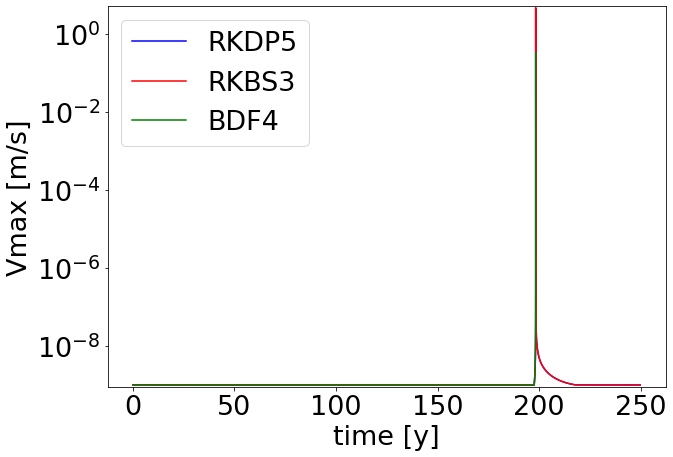

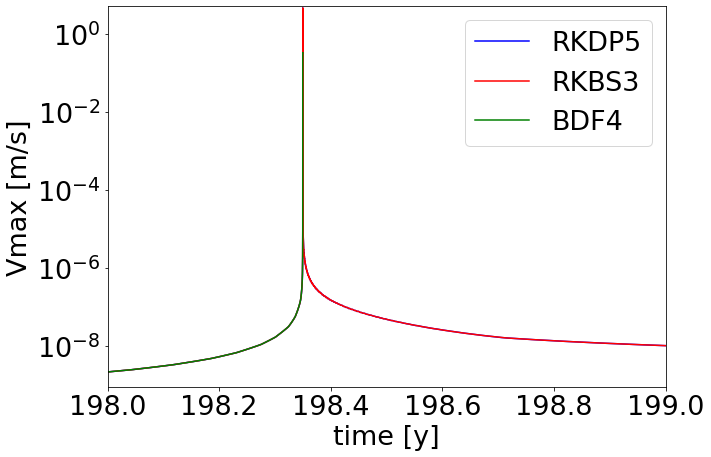

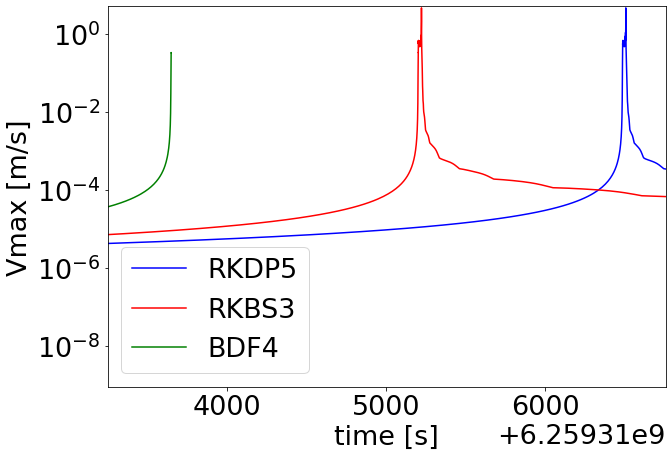

In [46]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, V_array_RKDP5,'-b', label = "RKDP5")
plt.plot(time_years_RKBS3, V_array_RKBS3,'-r', label = "RKBS3")
plt.plot(time_years_BDF3, V_array_BDF3,'-g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(np.min(V_array_BDF3),min(np.min(V_array_RKDP5), np.min(V_array_RKBS3))), 1.1*max(np.max(V_array_BDF3),max(np.max(V_array_RKDP5), np.max(V_array_RKBS3))))

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionVall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, V_array_RKDP5,'-b', label = "RKDP5")
plt.plot(time_years_RKBS3, V_array_RKBS3,'-r', label = "RKBS3")
plt.plot(time_years_BDF3, V_array_BDF3,'-g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(np.min(V_array_BDF3),min(np.min(V_array_RKDP5), np.min(V_array_RKBS3))), 1.1*max(np.max(V_array_BDF3),max(np.max(V_array_RKDP5), np.max(V_array_RKBS3))))
plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionVsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})


plt.plot(time_array_RKDP5, V_array_RKDP5,'-b', label = "RKDP5")
plt.plot(time_array_RKBS3, V_array_RKBS3,'-r', label = "RKBS3")
plt.plot(time_array_BDF3, V_array_BDF3,'-g', label = "BDF4")

plt.xlabel("time [s]")
plt.ylabel("Vmax [m/s]")

plt.yscale('log')

plt.ylim(0.9*min(np.min(V_array_BDF3),min(np.min(V_array_RKDP5), np.min(V_array_RKBS3))), 1.1*max(np.max(V_array_BDF3),max(np.max(V_array_RKDP5), np.max(V_array_RKBS3))))
plt.xlim(begin_earthquake, end_earthquake)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionVearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



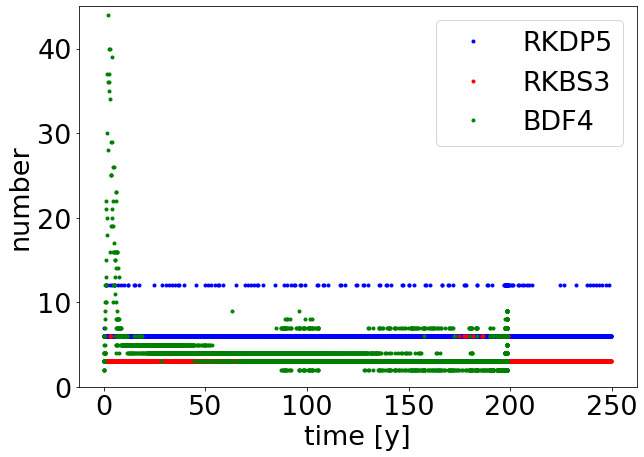

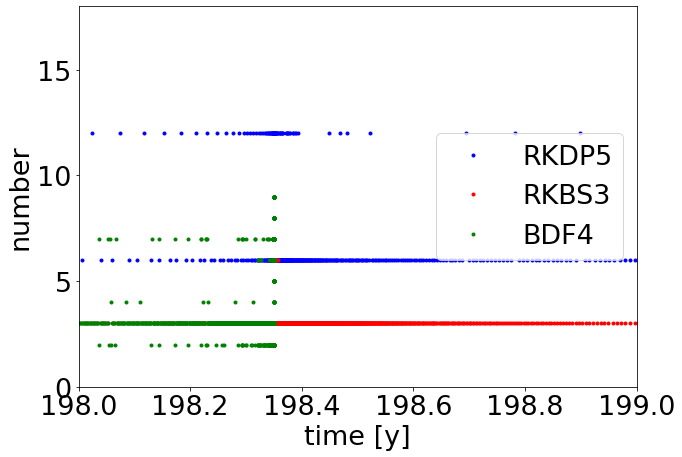

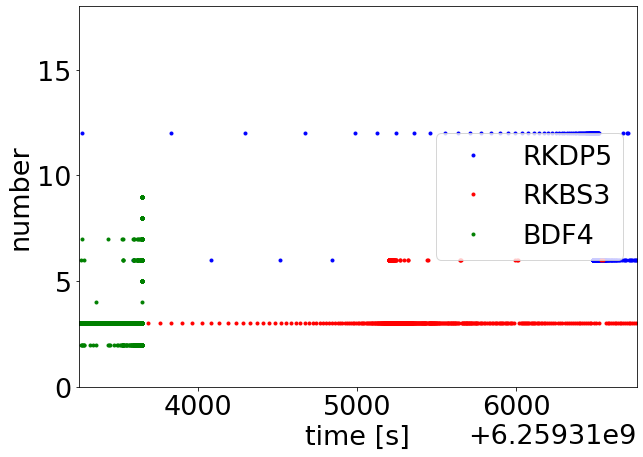

In [47]:
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, rhs_count_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_years_RKBS3, rhs_count_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_years_BDF3, rhs_count_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("number")

plt.ylim(0, 45)
#plt.ylim(0, max(np.max(rhs_count_array_BDF3), max(np.max(rhs_count_array_RKDP5), np.max(rhs_count_array_RKBS3)))+6)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRHSall.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, rhs_count_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_years_RKBS3, rhs_count_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_years_BDF3, rhs_count_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [y]")
plt.ylabel("number")

plt.ylim(0, 18)
#plt.ylim(0, max(np.max(rhs_count_array_BDF3), max(np.max(rhs_count_array_RKDP5), np.max(rhs_count_array_RKBS3)))+6)

plt.xlim(begin_surroundings, end_surroundings)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRHSsurroundings.png', format='png',dpi=300, bbox_inches='tight')

plt.show()



#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})


plt.plot(time_array_RKDP5, rhs_count_array_RKDP5,'.b', label = "RKDP5")
plt.plot(time_array_RKBS3, rhs_count_array_RKBS3,'.r', label = "RKBS3")
plt.plot(time_array_BDF3, rhs_count_array_BDF3,'.g', label = "BDF4")

plt.xlabel("time [s]")
plt.ylabel("number")

plt.ylim(0, 18)
#plt.ylim(0, max(np.max(rhs_count_array_BDF3), max(np.max(rhs_count_array_RKDP5), np.max(rhs_count_array_RKBS3)))+6)
plt.xlim(begin_earthquake, end_earthquake)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRHSearthquake.png', format='png',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
#compare velocities

# let RKDP5 be the reference solution, make a cubic interpolation to compare the values at the same times

interpolate_V_RKBS3 = prepare_interpolation_array(time_array_RKBS3, V_array_RKBS3)


V_ratio_RKBS3_RKDP5 = abs(interpolate_V_RKBS3(time_array_RKDP5) / V_array_RKDP5 - 1)

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, V_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [y]")
plt.ylabel("relative difference to RKDP5")

#plt.yscale('log')

#plt.ylim(1e-3, 1)

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioVall.png', format='png',dpi=300)

plt.show()






#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, V_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [y]")
plt.ylabel("relative difference to RKDP5")

plt.xlim(begin_surroundings, end_surroundings)

#plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioVsurroundings.png', format='png',dpi=300)

plt.show()





#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_array_RKDP5, V_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [s]")
plt.ylabel("relative difference to RKDP5")

plt.xlim(begin_earthquake, end_earthquake)

#plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioVearthquake.png', format='png',dpi=300)

plt.show()



In [ ]:
#compare dt

# let RKDP5 be the reference solution, make a cubic interpolation to compare the values at the same times
interpolate_dt_RKBS3 = prepare_interpolation_array(time_array_RKBS3, dt_array_RKBS3)

print( len(dt_array_RKDP5), len(time_array_RKDP5))
dt_ratio_RKBS3_RKDP5 = interpolate_dt_RKBS3(time_array_RKDP5) / dt_array_RKDP5 - 1

plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, dt_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [y]")
plt.ylabel("relative difference to RKDP5")

#plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioDTall.png', format='png',dpi=300)

plt.show()




#surroundings
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_years_RKDP5, dt_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [y]")
plt.ylabel("relative difference to RKDP5")

plt.xlim(begin_surroundings, end_surroundings)

#plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioDTsurroundings.png', format='png',dpi=300)

plt.show()





#earthquake
plt.figure(figsize=(10.00,7.00))
plt.rcParams.update({'font.size': 27})

plt.plot(time_array_RKDP5, dt_ratio_RKBS3_RKDP5,'-b', label = "RKBS3")

plt.xlabel("time [s]")
plt.ylabel("relative difference to RKDP5")

plt.xlim(begin_earthquake, end_earthquake)

#plt.yscale('log')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolutionRatioDTearthquake.png', format='png',dpi=300)

plt.show()

